# Network Intrusion Detection

In [1]:
%matplotlib inline

In [2]:
# to remove
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

import experiments

In [4]:
pd.set_option('display.max_columns', 200)

In [5]:
%%time
ni = experiments.NetworkIntrusionDetection()

CPU times: user 15.4 s, sys: 2.13 s, total: 17.5 s
Wall time: 6.1 s


In [6]:
ni.df.shape

(494021, 42)

## Dataset stats

In [38]:
%%time
ni.report_labels()

CPU times: user 338 ms, sys: 56.8 ms, total: 395 ms
Wall time: 394 ms


,attacks,prevalence,prevalence (overall),records
label,,,,
smurf.,280790,0.742697,0.568377,378068
neptune.,107201,0.524264,0.216997,204479
back.,2203,0.022145,0.004459,99481
satan.,1589,0.016072,0.003216,98867
ipsweep.,1247,0.012657,0.002524,98525
portsweep.,1040,0.010578,0.002105,98318
warezclient.,1020,0.010377,0.002065,98298
teardrop.,979,0.009964,0.001982,98257
pod.,264,0.002707,0.000534,97542


## Baseline and Oracle

In [8]:
%%time
df_baseline_oracle = ni.report_baseline_oracle()

CPU times: user 22.7 s, sys: 6.08 s, total: 28.7 s
Wall time: 17.9 s


In [9]:
df_baseline_oracle

,baseline_random_FN,baseline_random_FP,baseline_random_f1,baseline_random_precision,baseline_random_recall,baseline_unsupervised_FN,baseline_unsupervised_FP,baseline_unsupervised_f1,baseline_unsupervised_precision,baseline_unsupervised_recall,oracle_FN,oracle_FP,oracle_average precision,oracle_f1,oracle_precision,oracle_recall,oracle_roc auc,oracle_train time (s),prevalence
label,,,,,,,,,,,,,,,,,,,
smurf.,7186.5,7214.0,0.743104,0.743598,0.744061,19212,9728,0.379955,0.476849,0.315788,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.728290,0.742698
neptune.,5104.5,5080.5,0.525150,0.526556,0.523834,5485,5534,0.487226,0.486118,0.488340,1,0,1.000000,0.999953,1.0,0.999907,1.000000,0.478475,0.524266
back.,215.5,226.0,0.020227,0.020008,0.020455,202,180,0.086124,0.090909,0.081818,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.161669,0.022153
satan.,155.0,155.5,0.026016,0.026936,0.025157,13,16,0.909657,0.901235,0.918239,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.258113,0.016070
ipsweep.,123.5,122.5,0.011177,0.010597,0.012000,116,130,0.068182,0.064748,0.072000,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.142372,0.012649
portsweep.,103.0,97.5,0.009501,0.009390,0.009615,50,44,0.534653,0.551020,0.519231,1,0,0.990486,0.995169,1.0,0.990385,0.995188,0.160033,0.010578
warezclient.,101.0,103.0,0.009179,0.008637,0.009804,101,84,0.010695,0.011765,0.009804,2,0,0.999534,0.990099,1.0,0.980392,0.999997,0.244905,0.010377
teardrop.,97.0,97.0,0.009975,0.009756,0.010204,68,73,0.298507,0.291262,0.306122,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.141988,0.009961
pod.,26.0,26.0,0.000000,0.000000,0.000000,26,39,0.000000,0.000000,0.000000,1,0,1.000000,0.980392,1.0,0.961538,1.000000,0.140743,0.002717


In [10]:
df_baseline_oracle.mean().round(2)

baseline_random_FN                 1313.50
baseline_random_FP                 1314.50
baseline_random_f1                    0.14
baseline_random_precision             0.14
baseline_random_recall                0.14
baseline_unsupervised_FN           2528.40
baseline_unsupervised_FP           1584.00
baseline_unsupervised_f1              0.33
baseline_unsupervised_precision       0.34
baseline_unsupervised_recall          0.32
oracle_FN                             0.50
oracle_FP                             0.00
oracle_average precision              1.00
oracle_f1                             1.00
oracle_precision                      1.00
oracle_recall                         0.99
oracle_roc auc                        1.00
oracle_train time (s)                 0.26
prevalence                            0.14
dtype: float64

In [11]:
df_baseline_oracle.std().round(2)

baseline_random_FN                 2594.14
baseline_random_FP                 2596.90
baseline_random_f1                    0.27
baseline_random_precision             0.27
baseline_random_recall                0.27
baseline_unsupervised_FN           6104.01
baseline_unsupervised_FP           3337.23
baseline_unsupervised_f1              0.29
baseline_unsupervised_precision       0.30
baseline_unsupervised_recall          0.30
oracle_FN                             0.71
oracle_FP                             0.00
oracle_average precision              0.00
oracle_f1                             0.01
oracle_precision                      0.00
oracle_recall                         0.01
oracle_roc auc                        0.00
oracle_train time (s)                 0.19
prevalence                            0.27
dtype: float64

## Active Learning

In [49]:
df_active_learning = ni.report_active_learning()
df_active_learning

,initial_FN,initial_FP,initial_average precision,initial_f1,initial_precision,initial_recall,initial_roc auc,label,learner,query time (s),sample_100_FN,sample_100_FP,sample_100_average precision,sample_100_f1,sample_100_precision,sample_100_recall,sample_100_roc auc,sample_10_FN,sample_10_FP,sample_10_average precision,sample_10_f1,sample_10_precision,sample_10_recall,sample_10_roc auc,sample_1_FN,sample_1_FP,sample_1_average precision,sample_1_f1,sample_1_precision,sample_1_recall,sample_1_roc auc,sample_25_FN,sample_25_FP,sample_25_average precision,sample_25_f1,sample_25_precision,sample_25_recall,sample_25_roc auc,sample_50_FN,sample_50_FP,sample_50_average precision,sample_50_f1,sample_50_precision,sample_50_recall,sample_50_roc auc,sampling strategy,train time (s)
0,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,smurf.,RandomForestClassifier,0.113536,12,0,1.000000,0.999786,1.000000,0.999573,1.000000,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,12,0,1.000000,0.999786,1.000000,0.999573,1.000000,12,0,1.000000,0.999786,1.000000,0.999573,1.000000,random_sampling,0.105282
1,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,smurf.,RandomForestClassifier,0.111460,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,6,0,1.000000,0.999893,1.000000,0.999786,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,entropy_sampling,0.109376
2,9,57,0.999997,0.998826,0.997973,0.999679,0.999991,smurf.,LogisticRegression,0.002383,9,6,0.999799,0.999733,0.999786,0.999679,0.999891,9,5,0.999998,0.999751,0.999822,0.999679,0.999995,9,67,0.999922,0.998648,0.997619,0.999679,0.999886,9,6,0.999798,0.999733,0.999786,0.999679,0.999890,9,4,0.999805,0.999768,0.999858,0.999679,0.999890,random_sampling,0.024312
3,9,57,0.999997,0.998826,0.997973,0.999679,0.999991,smurf.,LogisticRegression,0.002559,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1,7,1.000000,0.999858,0.999751,0.999964,1.000000,9,3,0.999818,0.999786,0.999893,0.999679,0.999888,1,5,0.999820,0.999893,0.999822,0.999964,0.999793,0,2,1.000000,0.999964,0.999929,1.000000,1.000000,entropy_sampling,0.026511
0,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,neptune.,RandomForestClassifier,0.112695,3,0,1.000000,0.999860,1.000000,0.999720,1.000000,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,3,0,1.000000,0.999860,1.000000,0.999720,1.000000,3,0,1.000000,0.999860,1.000000,0.999720,1.000000,random_sampling,0.109523
1,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,neptune.,RandomForestClassifier,0.112593,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,entropy_sampling,0.108728
2,6,3,0.999993,0.999580,0.999720,0.999440,0.999992,neptune.,LogisticRegression,0.001880,6,2,0.999994,0.999627,0.999813,0.999440,0.999993,6,2,0.999994,0.999627,0.999813,0.999440,0.999993,6,2,0.999994,0.999627,0.999813,0.999440,0.999993,6,2,0.999993,0.999627,0.999813,0.999440,0.999992,5,1,0.999996,0.999720,0.999907,0.999534,0.999996,random_sampling,0.024976
3,6,3,0.999993,0.999580,0.999720,0.999440,0.999992,neptune.,LogisticRegression,0.002293,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,6,8,0.999870,0.999347,0.999254,0.999440,0.999922,5,1,0.999996,0.999720,0.999907,0.999534,0.999995,2,0,1.000000,0.999907,1.000000,0.999813,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,entropy_sampling,0.026525
0,2,0,1.000000,0.995434,1.000000,0.990909,1.000000,back.,RandomForestClassifier,0.109122,2,0,1.000000,0.995434,1.000000,0.990909,1.000000,3,0,1.000000,0.993135,1.000000,0.986364,1.000000,2,0,1.000000,0.995434,1.000000,0.990909,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000

In [31]:
ni.report_active_learning_across_labels()

initial_FN        initial_FP         \
                                               mean    std       mean    std   
learner                sampling strategy                                       
LogisticRegression     entropy_sampling        20.2  29.86       14.8  17.18   
                       random_sampling         20.2  29.86       14.8  17.18   
RandomForestClassifier entropy_sampling         8.0   6.18        0.2   0.63   
                       random_sampling          8.0   6.18        0.2   0.63   

                                         initial_average precision        \
                                                              mean   std   
learner                sampling strategy                                   
LogisticRegression     entropy_sampling                       0.72  0.36   
                       random_sampling                        0.72  0.36   
RandomForestClassifier entropy_sampling                       0.97  0.05   
                       random_sampling                        0.97  0.05   

                                         initial_f1       initial_precision  \
                                               mean   std              mean   
learner                sampling strategy                                      
LogisticRegression     entropy_sampling        0.76  0.32              0.76   
                       random_sampling         0.76  0.32              0.76   
RandomForestClassifier entropy_sampling        0.94  0.07              1.00   
                       random_sampling         0.94  0.07              1.00   

                                               initial_recall        \
                                           std           mean   std   
learner                sampling strategy                              
LogisticRegression     entropy_sampling   0.33           0.76  0.31   
                       random_sampling    0.33           0.76  0.31   
RandomForestClassifier entropy_sampling   0.01           0.90  0.12   
                       random_sampling    0.01           0.90  0.12   

                                         initial_roc auc       query time (s)  \
                                                    mean   std           mean   
learner                sampling strategy                                        
LogisticRegression     entropy_sampling             0.97  0.04           0.00   
                       random_sampling              0.97  0.04           0.00   
RandomForestClassifier entropy_sampling             0.99  0.03           0.11   
                       random_sampling              0.99  0.03           0.11   

                                              sample_100_FN         \
                                          std          mean    std   
learner                sampling strategy                             
LogisticRegression     entropy_sampling   0.0           5.0   5.91   
                       random_sampling    0.0          23.7  30.27   
RandomForestClassifier entropy_sampling   0.0           1.2   1.81   
                       random_sampling    0.0           9.5   5.89   

                                         sample_100_FP         \
                                                  mean    std   
learner                sampling strategy                        
LogisticRegression     entropy_sampling           15.4  31.90   
                       random_sampling             9.7   8.81   
RandomForestClassifier entropy_sampling            0.0   0.00   
                       random_sampling             0.3   0.67   

                                         sample_100_average precision        \
                                                                 mean   std   
learner                sampling strategy                                      
LogisticRegression     entropy_sampling                          0.86  0.25   
                       random_sampling                          

In [50]:
ni.report_active_learning_query_time()

{('RandomForestClassifier', 'random_sampling'): {'0.04±0.04'},
 ('RandomForestClassifier', 'entropy_sampling'): {'0.18±0.07'},
 ('LogisticRegression', 'random_sampling'): {'0.04±0.04'},
 ('LogisticRegression', 'entropy_sampling'): {'0.04±0.04'}}

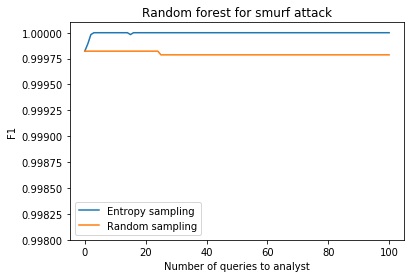

In [84]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='smurf',
    learner1='RandomForestClassifier', sampling1='entropy',
    learner2='RandomForestClassifier', sampling2='random',
    title='Random forest for smurf attack',
    ylim=[0.9980, 1.0001], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

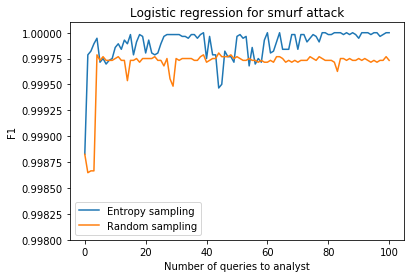

In [68]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='smurf',
    learner1='LogisticRegression', sampling1='entropy',
    learner2='LogisticRegression', sampling2='random',
    title='Logistic regression for smurf attack',
    ylim=[0.9980, 1.0001], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

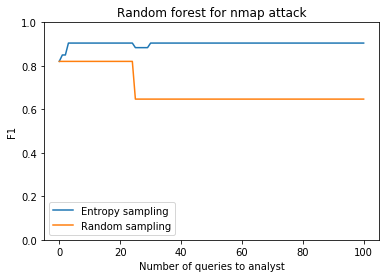

In [62]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='nmap',
    learner1='RandomForestClassifier', sampling1='entropy',
    learner2='RandomForestClassifier', sampling2='random',
    title='Random forest for nmap attack',
    ylim=[0, 1], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

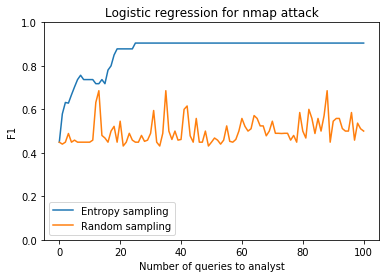

In [61]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='nmap',
    learner1='LogisticRegression', sampling1='entropy',
    learner2='LogisticRegression', sampling2='random',
    title='Logistic regression for nmap attack',
    ylim=[0, 1], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

## Ensemble

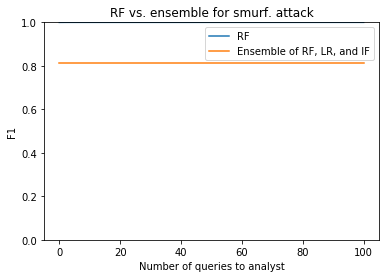

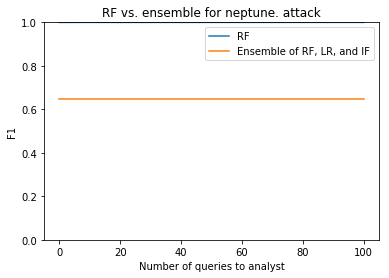

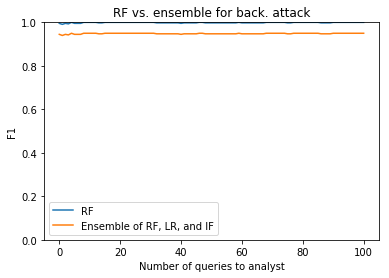

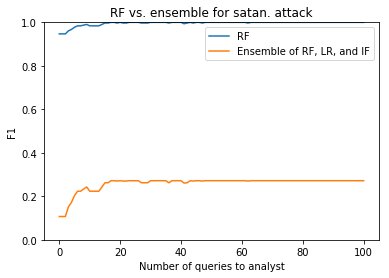

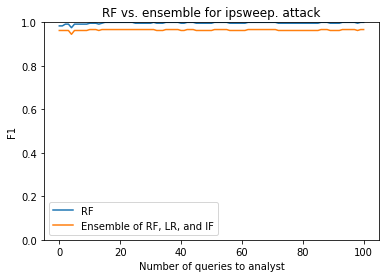

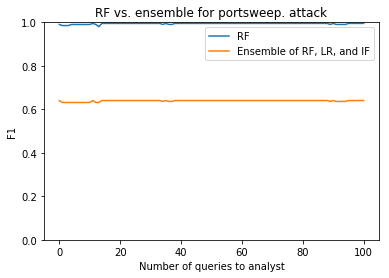

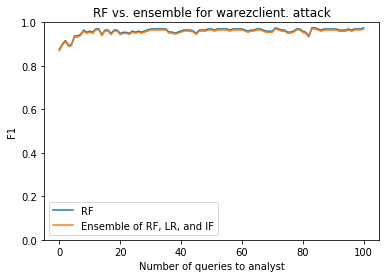

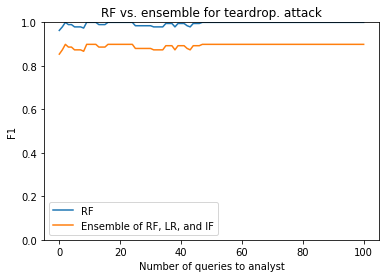

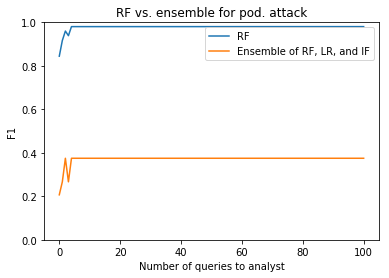

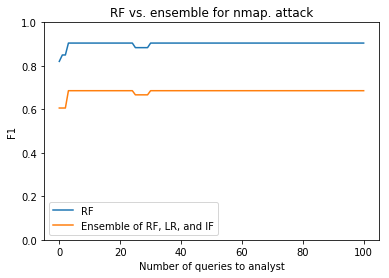

In [247]:
for label in ni.features:
    try:
        ni.plot_active_learning_time_series_overlapping(
            attribute='f1', label=label.replace('.', ''),
            learner1='RandomForestClassifier', sampling1='entropy',
            learner2='VotingClassifier', sampling2='entropy',
            title=f'RF vs. ensemble for {label} attack',
            ylim=[0, 1], ylabel='F1',
            legend=['RF', 'Ensemble of RF, LR, and IF']
        )
        plt.show()
    except:
        pass

## Error analysis

### Uncertainty sampling drawbacks

In [129]:
import numpy as np
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling, uncertainty_sampling
import matplotlib.pyplot as plt

In [130]:
label = 'nmap.'

In [218]:
def get_predictions(estimator):
    predictions = estimator.predict(active_learning_data.x_dev)
    print(ni._get_metrics(active_learning_data.y_dev,
                    predictions, None))
    return predictions

def get_feature_importance(estimator, n=10):
    df = pd.DataFrame({'feature': ni.splits[label]['x_train'].columns,
             'importance': estimator.feature_importances_}).sort_values(by='importance', ascending=False)[:n][::-1]
    df.set_index('feature').plot(kind='barh', legend=False)
    plt.title(f'Top {n} features by importance')
    plt.xlabel('Gini importance')
    
def get_gets_wrong(predictions):
    return pd.DataFrame(active_learning_data.x_dev[predictions != active_learning_data.y_dev],
                 columns=ni.splits['nmap.']['x_train'].columns)
    
def get_right_wrong_comp(predictions, n=10):
    # doesn't get right
    gets_wrong = get_gets_wrong(predictions)
    gets_right = pd.DataFrame(active_learning_data.x_dev[(predictions == active_learning_data.y_dev) & (active_learning_data.y_dev)],
             columns=ni.splits['nmap.']['x_train'].columns)
    z = (gets_wrong.mean() - gets_right.mean()) / gets_right.std()
    z = z.abs()
    return z[pd.notnull(z) & np.isfinite(z)].sort_values(ascending=False)[:n]

In [219]:
active_learning_data = ni._active_learning_data_split(label)
active_learner = ActiveLearner(ni.active_learning_rf, uncertainty_sampling,
                              active_learning_data.x_train_start.values,
                              active_learning_data.y_train_start.values)

In [220]:
predictions = get_predictions(active_learner)

{'precision': 1.0, 'recall': 0.6956521739130435, 'f1': 0.8205128205128205, 'FP': 0, 'FN': 7}


In [224]:
indices = np.array(range(len(active_learning_data.y_dev)))[predictions != active_learning_data.y_dev]
active_learner.predict_proba(active_learning_data.x_dev[indices])

array([[1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ]])

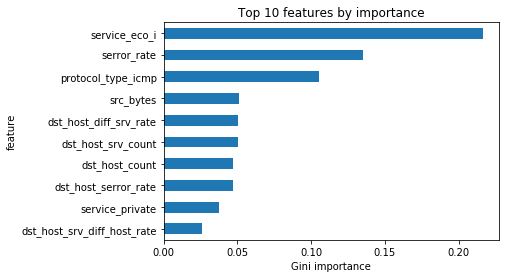

In [193]:
get_feature_importance(active_learner.estimator, n=10)

In [194]:
get_right_wrong_comp(predictions, n=10)

src_bytes                      28.821429
srv_diff_host_rate              0.750000
service_eco_i                   0.750000
service_private                 0.750000
protocol_type_icmp              0.750000
dst_host_srv_diff_host_rate     0.749792
dst_host_count                  0.617108
dst_host_serror_rate            0.532857
dst_host_diff_srv_rate          0.491316
srv_count                       0.455465
dtype: float64

In [226]:
index = active_learner.query(active_learning_data.x_train_pool.values)[0][0]
index

1488

In [196]:
pd.DataFrame(
active_learning_data.x_train_pool.values[index].reshape(1, -1),
    columns=ni.splits['nmap.']['x_dev'].columns
)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_auth,service_ctf,service_domain,service_domain_u,service_eco_i,service_ecr_i,service_finger,service_ftp,service_ftp_data,service_http,service_nntp,service_ntp_u,service_other,service_pop_3,service_private,service_red_i,service_shell,service_smtp,service_ssh,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i
0,1.0,0.0,0.0,234.0,0.96,0.0,0.97,0.0,0.97,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
active_learning_data.y_train_pool[index]

True

In [198]:
x_instance, y_instance = ni._get_active_learning_instance(active_learning_data.x_train_pool,
                                                          active_learning_data.y_train_pool,
                                                          [index])

In [199]:
active_learner.teach(x_instance, y_instance)

In [201]:
predictions = get_predictions(active_learner)

{'precision': 1.0, 'recall': 0.7391304347826086, 'f1': 0.85, 'FP': 0, 'FN': 6}


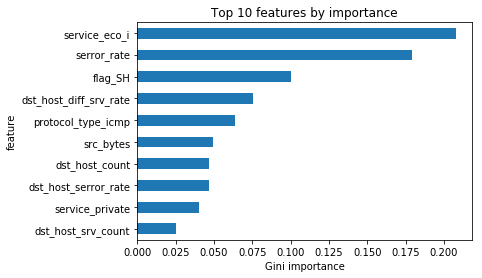

In [202]:
get_feature_importance(active_learner.estimator, n=10)

In [203]:
index = active_learner.query(active_learning_data.x_train_pool.values)[0][0]
index

9210

In [204]:
active_learning_data.y_train_pool[index]

True

In [205]:
x_instance, y_instance = ni._get_active_learning_instance(active_learning_data.x_train_pool,
                                                          active_learning_data.y_train_pool,
                                                          [index])

In [206]:
active_learner.teach(x_instance, y_instance)

In [208]:
predictions = get_predictions(active_learner)

{'precision': 1.0, 'recall': 0.7391304347826086, 'f1': 0.85, 'FP': 0, 'FN': 6}


In [209]:
pd.DataFrame(
active_learning_data.x_train_pool.values[index].reshape(1, -1),
    columns=ni.splits['nmap.']['x_dev'].columns
).src_bytes

0    0.0
Name: src_bytes, dtype: float64

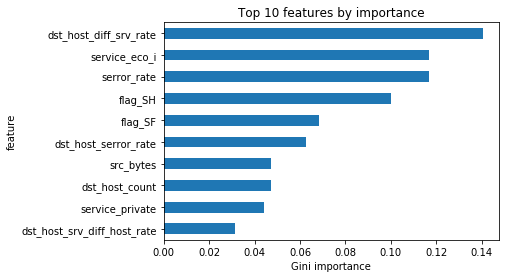

In [210]:
get_feature_importance(active_learner.estimator)

In [211]:
get_right_wrong_comp(predictions, n=10)

src_bytes                      34.302328
dst_host_same_src_port_rate    13.638587
dst_host_serror_rate            0.783118
dst_host_count                  0.731372
dst_host_diff_srv_rate          0.730442
srv_diff_host_rate              0.716498
service_eco_i                   0.716498
protocol_type_icmp              0.716498
service_private                 0.716498
dst_host_srv_diff_host_rate     0.716306
dtype: float64

In [213]:
clf = ni.active_learning_rf
clf.fit(ni.splits[label]['x_train'], ni.splits[label]['y_train'])
predictions = get_predictions(clf)

{'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'FP': 0, 'FN': 0}


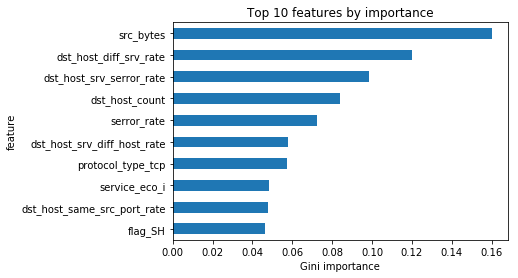

In [214]:
get_feature_importance(clf, n=10)

In [215]:
get_right_wrong_comp(predictions)

Series([], dtype: float64)

In [25]:
pd.DataFrame(active_learning_data.x_dev[active_learning_data.y_dev],
             columns=ni.splits['nmap.']['x_train'].columns)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_auth,service_ctf,service_domain,service_domain_u,service_eco_i,service_ecr_i,service_finger,service_ftp,service_ftp_data,service_http,service_nntp,service_ntp_u,service_other,service_pop_3,service_private,service_red_i,service_shell,service_smtp,service_ssh,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i
0,1.0,0.0,0.0,255.0,0.98,0.0,1.00,0.00,1.00,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,255.0,1.00,0.0,1.00,0.00,1.00,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,255.0,1.00,0.0,1.00,0.00,1.00,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,255.0,1.00,0.0,1.00,0.00,1.00,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,255.0,1.00,0.0,1.00,0.00,1.00,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,255.0,1.00,0.0,1.00,0.00,1.00,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,255.0,1.00,0.0,1.00,0.00,1.00,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,0.0,0.0,62.0,0.03,0.0,0.87,0.87,0.00,54.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,207.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,24.0,0.75,0.0,0.67,0.04,0.67,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,3